# Project: ij-blocking

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import re


In [2]:
def read_field_from_file(filename, num_halo=None):
    (rank, nbits, num_halo, nx, ny, nz) = np.fromfile(filename, dtype=np.int32, count=6)
    offset=(3 + rank) * 32 // nbits
    data = np.fromfile(filename, dtype=np.float32 if nbits == 32 else np.float64, \
                       count=nz * ny * nx + offset)
    if rank == 3:
        return np.reshape(data[offset:], (nz, ny, nx))
    else:
        return np.reshape(data[offset:], (ny, nx))

def validate_results(out_field, k_lev = 32, if_plot = True):
    
    num_tests = len(out_field)
    
    if if_plot:
        if num_tests > 4:
            fig, axs = plt.subplots(2, num_tests//2, figsize=(12, 8))
            axs = axs.flatten()

        else:
            fig, axs = plt.subplots(1, num_tests, figsize=(12, 4))

    test_diff = np.zeros(num_tests-1)
    
    for i, (key,data) in enumerate(out_field.items()):
        if i == 0:
            k_data = data
        if if_plot:
            im1 = axs[i].imshow(data[k_lev, :, :], origin='lower', vmin=-0.1, vmax=1.1);
            fig.colorbar(im1, ax=axs[i]);
            axs[i].set_title(key)
        if i > 0:
            test_diff[i-1] = np.sum(np.abs(k_data-data))
    plt.show()
    
    if sum(test_diff) != 0:
        print('MAE', np.array(test_diff)/ np.prod(k_data.shape))
        print(list(out_field.keys())[1:])
        return False
    return True
    

    


In [3]:
%%bash
module load daint-gpu
module switch PrgEnv-gnu PrgEnv-cray
module load perftools-lite

versions=('kblocking' 'complexity-copy' 'ijblocking-math' 'ijblocking2' 'averaging-nn' 'averaging-nnn' 'complexity-0' 'complexity-1' 'lap-nn-ij' 'lap-nnn-ij' 'ijblocking-inline' 'ijblocking-small' ) ## THIS SHOULD BE A COPY OF VERSIONS IN CELL BELOW


echo "===== cleaning up ====="
make clean
echo "===== compiling ====="
for version in "${versions[@]}"
do 
       make VERSION="$version"
done

===== cleaning up =====
rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report result_*.py report*.txt
===== compiling =====
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c m_utils.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-kblocking.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-kblocking.o -o stencil2d-kblocking.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-kblocking.x' (lite-samples) ...OK


cp stencil2d-kblocking.x stencil2d.x


make: *** No rule to make target 'stencil2d-complexity-copy.o', needed by 'stencil2d-complexity-copy.x'.  Stop.


ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-ijblocking-math.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-ijblocking-math.o -o stencil2d-ijblocking-math.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-ijblocking-math.x' (lite-samples) ...OK


cp stencil2d-ijblocking-math.x stencil2d.x
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-ijblocking2.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-ijblocking2.o -o stencil2d-ijblocking2.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-ijblocking2.x' (lite-samples) ...OK


cp stencil2d-ijblocking2.x stencil2d.x


make: *** No rule to make target 'stencil2d-averaging-nn.o', needed by 'stencil2d-averaging-nn.x'.  Stop.
make: *** No rule to make target 'stencil2d-averaging-nnn.o', needed by 'stencil2d-averaging-nnn.x'.  Stop.
make: *** No rule to make target 'stencil2d-complexity-0.o', needed by 'stencil2d-complexity-0.x'.  Stop.
make: *** No rule to make target 'stencil2d-complexity-1.o', needed by 'stencil2d-complexity-1.x'.  Stop.


ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-lap-nn-ij.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-lap-nn-ij.o -o stencil2d-lap-nn-ij.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-lap-nn-ij.x' (lite-samples) ...OK


cp stencil2d-lap-nn-ij.x stencil2d.x
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-lap-nnn-ij.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-lap-nnn-ij.o -o stencil2d-lap-nnn-ij.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-lap-nnn-ij.x' (lite-samples) ...OK


cp stencil2d-lap-nnn-ij.x stencil2d.x
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-ijblocking-inline.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-ijblocking-inline.o -o stencil2d-ijblocking-inline.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-ijblocking-inline.x' (lite-samples) ...OK


cp stencil2d-ijblocking-inline.x stencil2d.x
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-ijblocking-small.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-ijblocking-small.o -o stencil2d-ijblocking-small.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-ijblocking-small.x' (lite-samples) ...OK


cp stencil2d-ijblocking-small.x stencil2d.x


srun -n 1 ./stencil2d-kblocking.x+orig --nx 16 --ny 32 --nz 64 --num_iter 10
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7553101E-03], \\', '] )']
srun -n 1 ./stencil2d-complexity-copy.x+orig --nx 16 --ny 32 --nz 64 --num_iter 10
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.4949570E-03], \\', '] )']
srun -n 1 ./stencil2d-ijblocking2.x+orig --nx 16 --ny 32 --nz 64 --size_i 8 --size_j 16 --num_iter 10
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5207062E-02], \\', '] )']
srun -n 1 ./stencil2d-averaging-nn.x+orig --nx 16 --ny 32 --nz 64 --num_iter 10
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5795956E-03], \\', '] )']
srun -n 1 ./stencil2d-averaging-nnn.x+orig --nx 16 --ny 32 --nz 64 --num_iter 10
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   

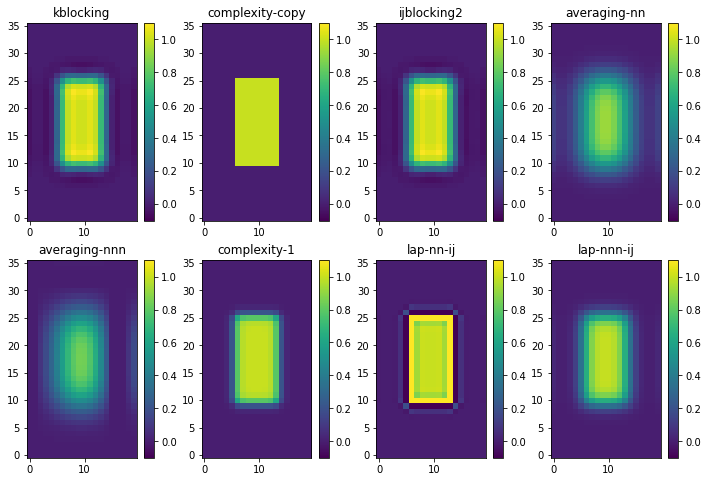

MAE [0.02521552 0.00021793 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7553101E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.4949570E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5207062E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5795956E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.8251667E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6384850E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

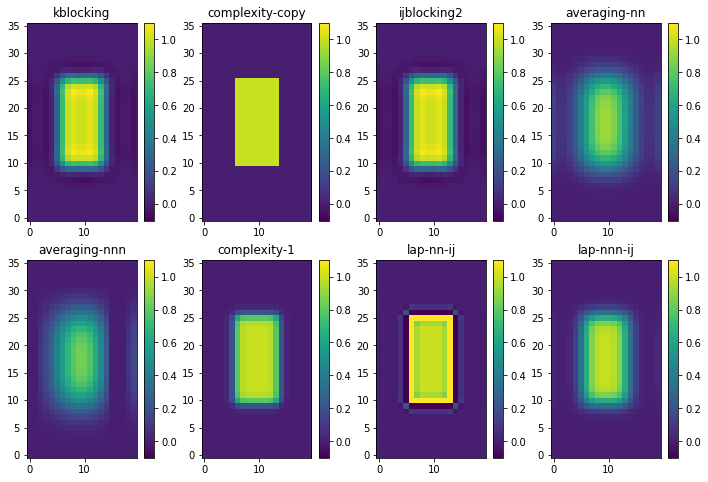

MAE [0.02521552 0.00022999 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7588863E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5242825E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5484581E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5986691E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7853508E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6334782E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

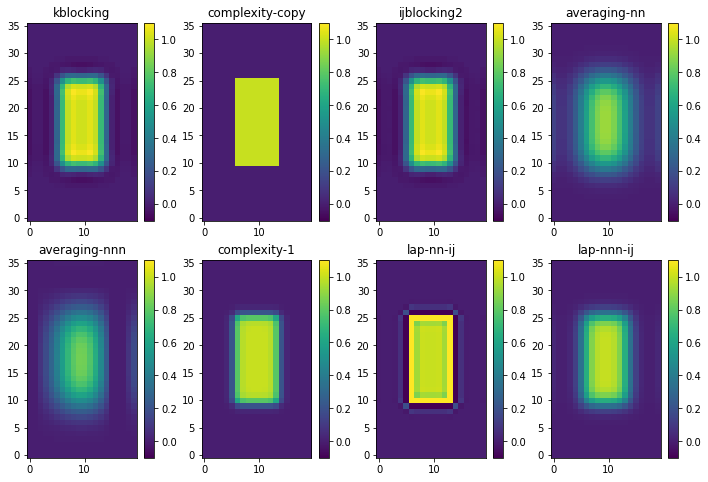

MAE [0.02521552 0.00020438 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7698536E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5691051E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5934238E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6077290E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.8080006E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6330013E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

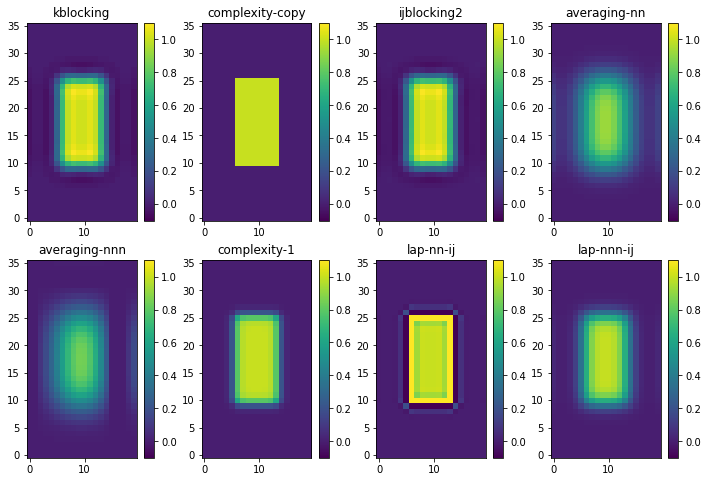

MAE [0.02521552 0.00101822 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7457733E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5652905E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5861759E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6055832E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.8130074E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6465912E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

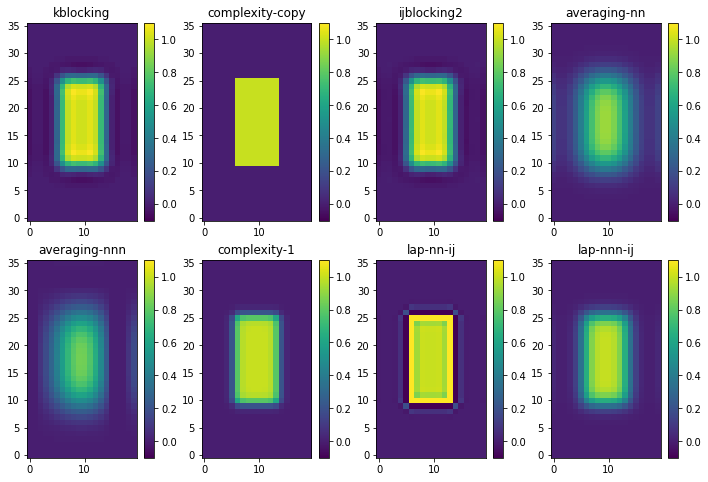

MAE [0.02521552 0.00097114 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7455349E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5266666E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6011724E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6227493E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7715225E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6163120E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

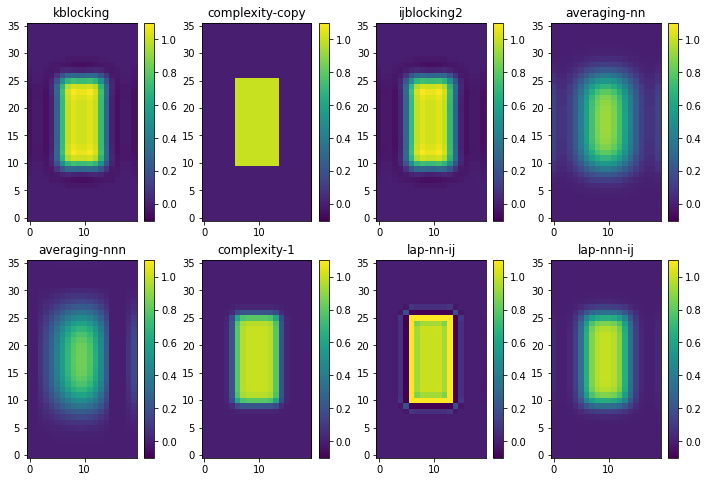

MAE [0.02521552 0.00086261 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7388592E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5190372E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6583452E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6570816E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.8196831E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6351471E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

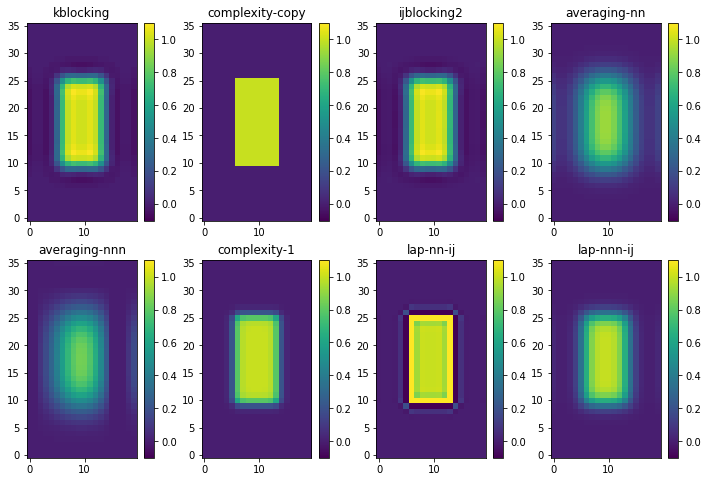

MAE [0.02521552 0.00116757 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7724762E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.4935265E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6755114E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5936623E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7855892E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6332397E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

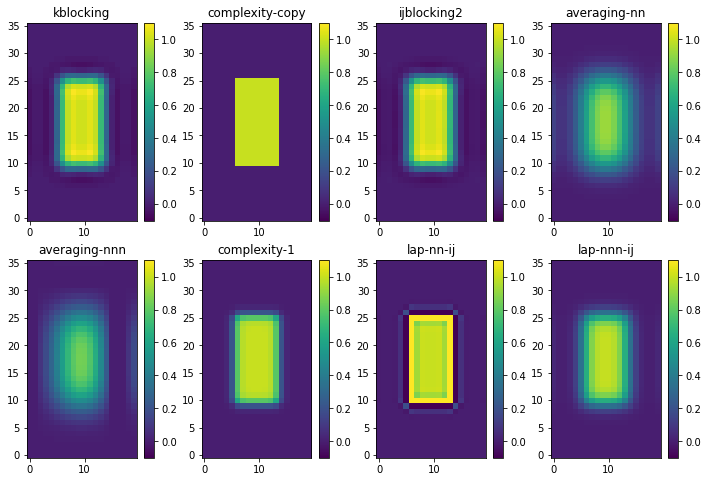

MAE [0.02521552 0.00117466 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7557869E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5121231E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7885933E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5936623E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.8239746E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6361008E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

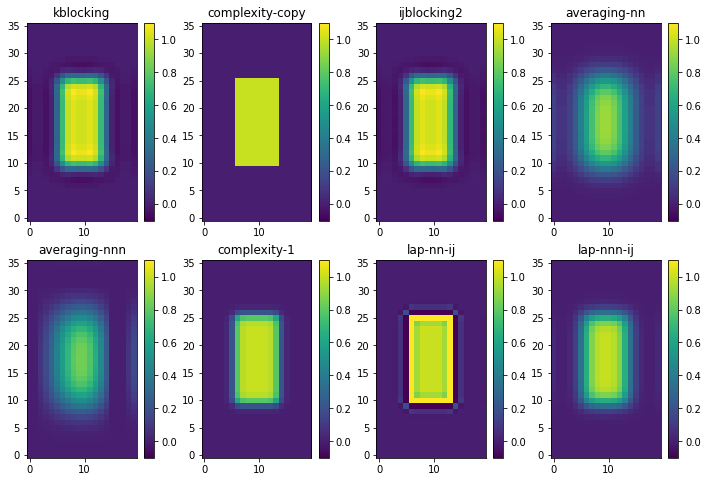

MAE [0.02521552 0.00105114 0.0444802  0.04691393 0.01166174 0.06097767
 0.01883635]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7579327E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5209446E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.7705212E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.5848408E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.8113384E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   32,   64,      10,  0.6208420E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

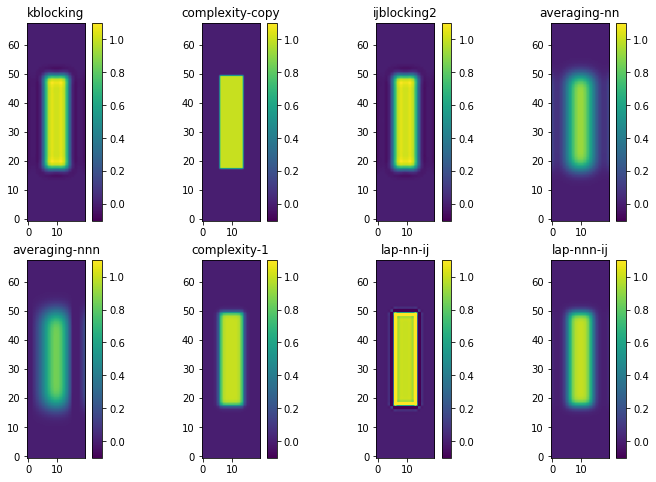

MAE [0.02255743 0.00021571 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1382351E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.9725094E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1021838E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1106977E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1581907E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1206398E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

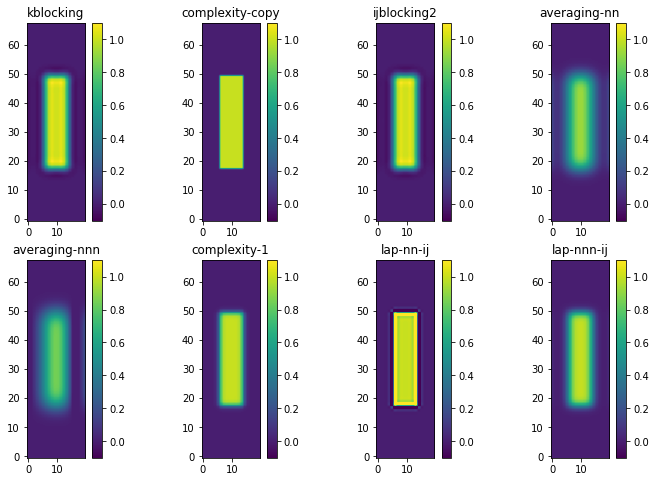

MAE [0.02255743 0.00022209 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1463652E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1005650E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1037335E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1073837E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1660824E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1202106E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

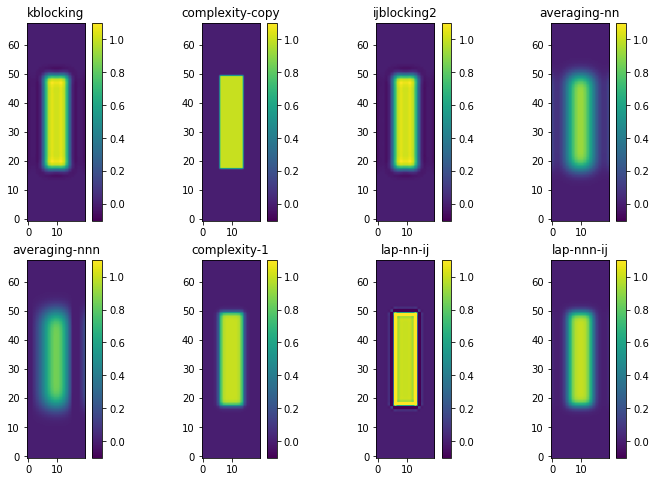

MAE [0.02255743 0.00020912 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1393557E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1070738E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1089144E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1130581E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1560926E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1173496E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

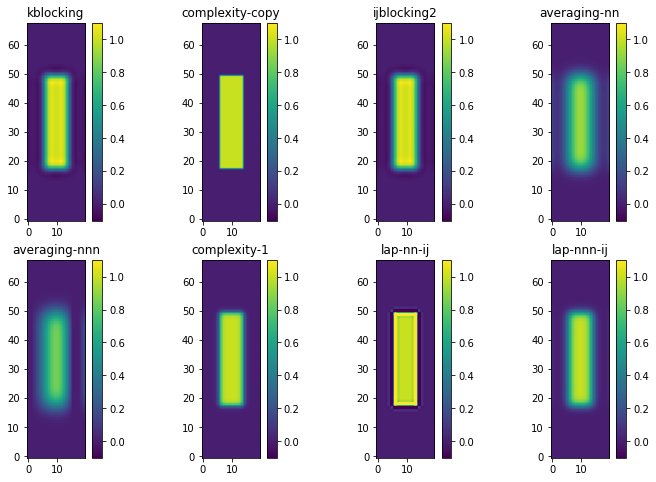

MAE [0.02255743 0.00097695 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1399755E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.9849072E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1115894E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1090050E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1594782E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1197100E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

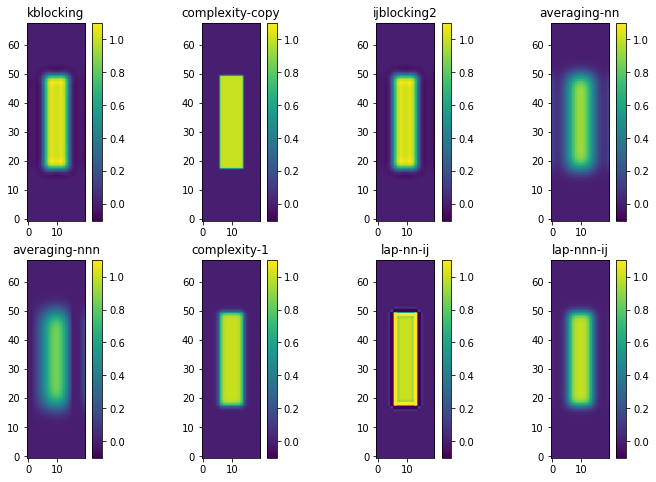

MAE [0.02255743 0.00095219 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1395702E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.9880066E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1142883E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1074314E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1632452E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1147270E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

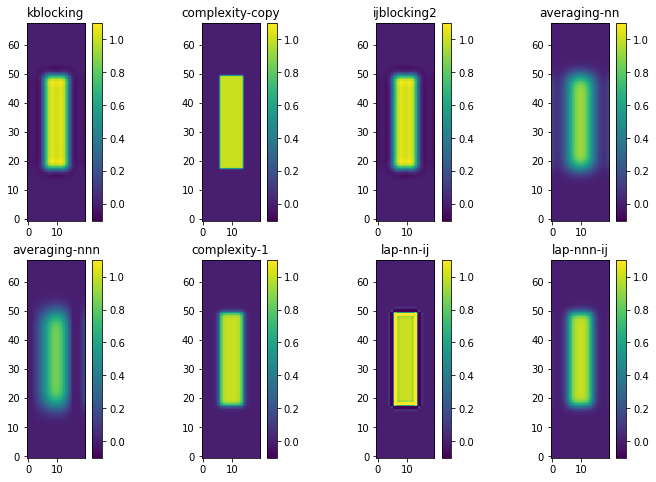

MAE [0.02255743 0.00090008 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1396179E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1047134E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1202345E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1117945E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1457453E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1137257E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

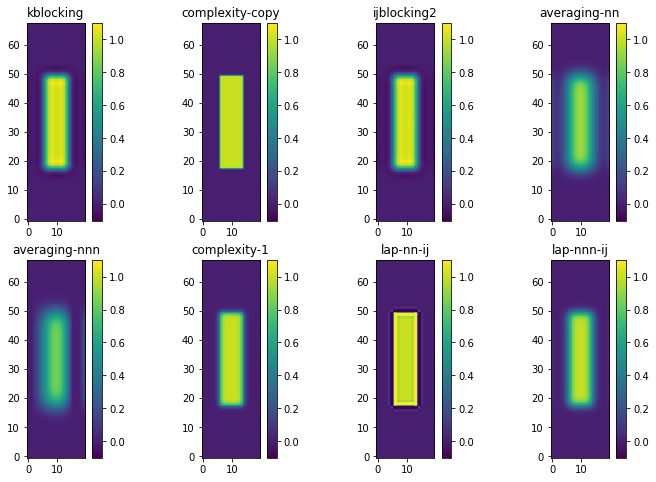

MAE [0.02255743 0.00110603 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1459360E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1028299E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1321149E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1125097E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1597881E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1173258E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

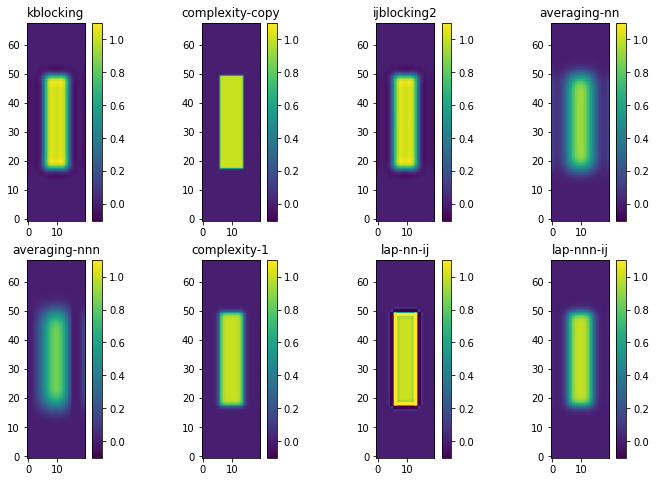

MAE [0.02255743 0.00110983 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1385689E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.9610653E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1510429E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1086712E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1585245E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1206398E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

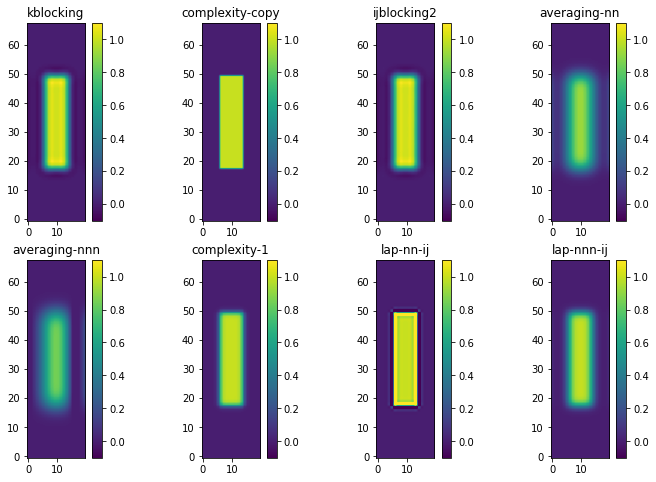

MAE [0.02255743 0.00104955 0.04189001 0.04320112 0.01075138 0.05395196
 0.01758671]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1407623E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.9770393E-03], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1408076E-01], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1096487E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1675844E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,   64,   64,      10,  0.1136541E-02], \\', '] )']
['# ranks nx ny nz num_iter time', 'data = np.array( [ 

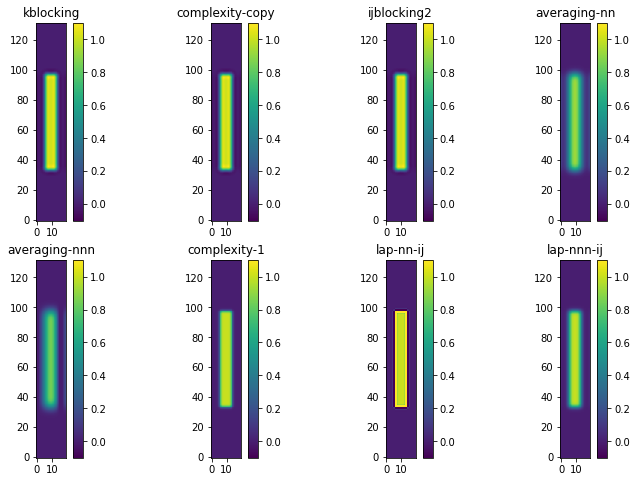

MAE [0.         0.00021471 0.04048563 0.0411057  0.0102578  0.05012273
 0.01690806]
['complexity-copy', 'ijblocking2', 'averaging-nn', 'averaging-nnn', 'complexity-1', 'lap-nn-ij', 'lap-nnn-ij']
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   16,  128,   64,      10,  0.2780437E-02], \\', '] )']
[]


IndexError: list index out of range

In [37]:
# srun slurm comand to start a job
# -n number of processes requested
versions = ['kblocking','complexity-copy','ijblocking2', 'averaging-nn'
           , 'averaging-nnn', 'complexity-1','lap-nn-ij', 'lap-nnn-ij'] ## THIS SHOULD BE A COPY OF VERSIONS IN CELL ABOVE
output = {}
out_field = {}
nx = np.array([16,32,64])
ny = np.array([32,64,128])
size_i = np.array([2,4,8])
size_j = np.array([2,4,8])
num_iter = 10

      
if versions[0] != 'kblocking':
    sys.exit('kblocking has to be first in versions. Leads to error in comparisons')

runtimes = {key: np.zeros((len(nx)*len(ny)*len(size_i)*len(size_j),5)) for key in versions}
ii_index = 0
for nx_ in nx:
    for ny_ in ny:
        for size_i_ in size_i:
            size_i_ = nx_//size_i_
            
            for size_j_ in size_j:
                size_j_ = ny_//size_j_
                for version in versions:
                    command = f"srun -n 1 ./stencil2d-{version}.x+orig --nx {nx_} --ny {ny_} --nz 64 --num_iter {num_iter}"
                    

                    if version == 'ijblocking2' :
                        command = f"srun -n 1 ./stencil2d-{version}.x+orig --nx {nx_} --ny {ny_} --nz 64 --size_i {size_i_} --size_j {size_j_} --num_iter {num_iter}"
                        


                    print(command)
                    out =  !{command}
                    print(out)
                    output.update({version: out})
                    out_field.update({version: read_field_from_file('out_field.dat')})
                
                validate_results(out_field)
                pattern = r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?"
                for i, (key, value) in enumerate(output.items()):
                    print(value)
                    matches = re.findall(pattern, value[2])
                    runtimes[key][ii_index] = [nx_,ny_,size_i_,size_j_,float(matches[-1])]
                ii_index+=1
                print(r'\n ============================= \n')



srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 2 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


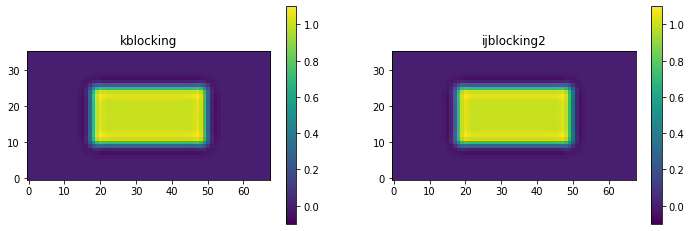

MAE [0.00042383]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 2 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


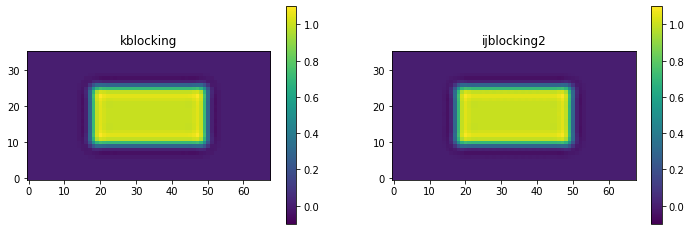

MAE [0.00049296]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 2 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


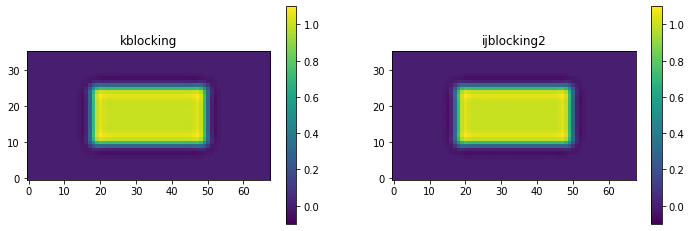

MAE [0.00052682]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 4 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


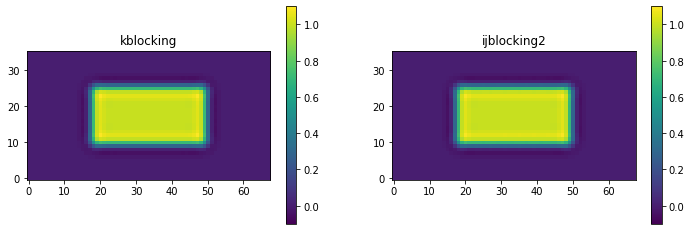

MAE [0.00027371]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 4 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


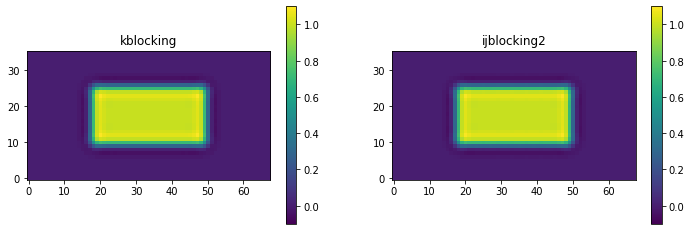

MAE [0.00033965]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 4 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


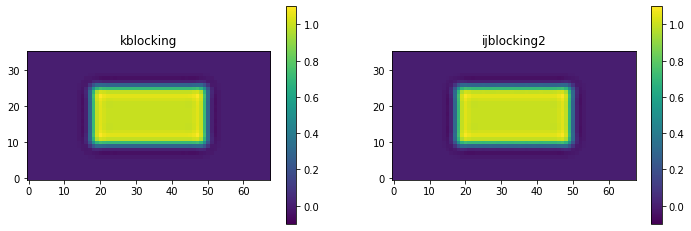

MAE [0.00036783]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 8 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


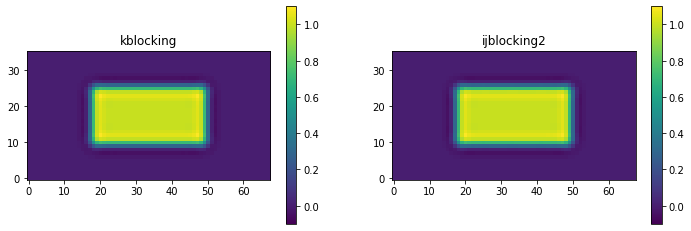

MAE [0.00021059]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 8 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


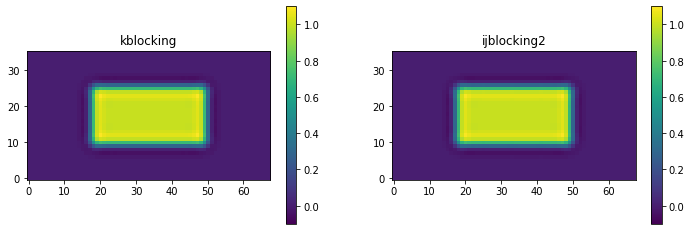

MAE [0.00027476]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 32 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 32 --nz 64 --size_i 8 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


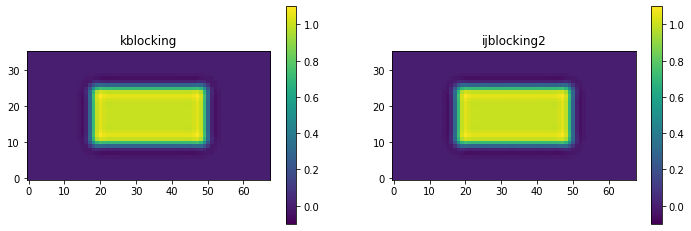

MAE [0.00030123]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 2 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


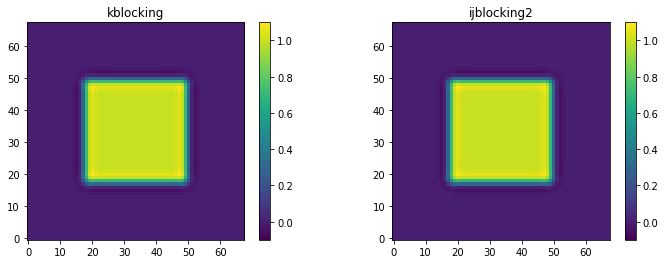

MAE [0.00028942]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 2 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


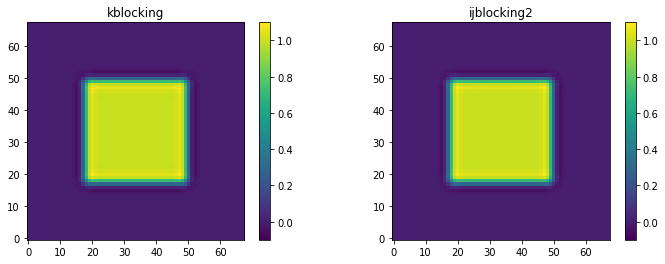

MAE [0.00035782]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 2 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


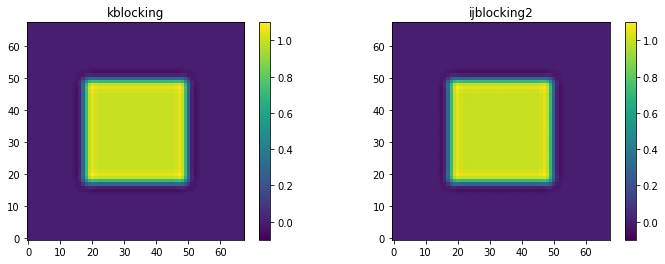

MAE [0.00039175]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 4 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


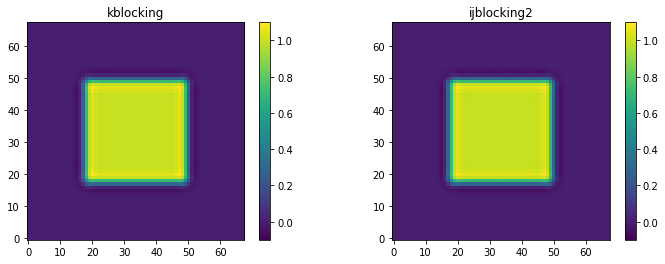

MAE [0.00019896]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 4 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


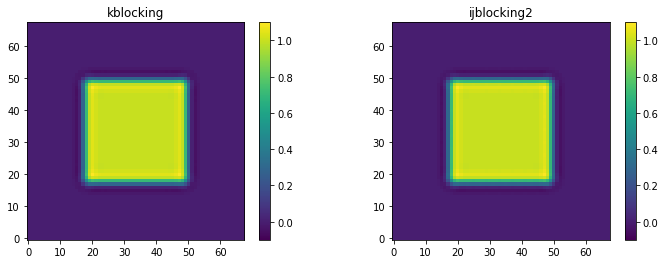

MAE [0.00026107]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 4 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


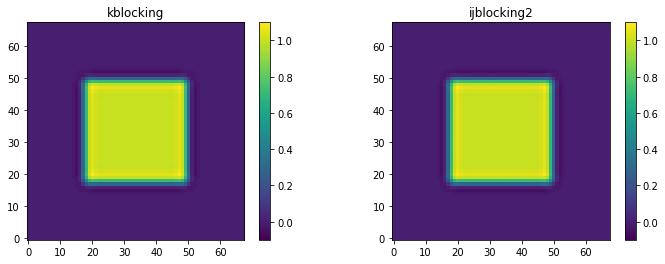

MAE [0.00028861]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 8 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


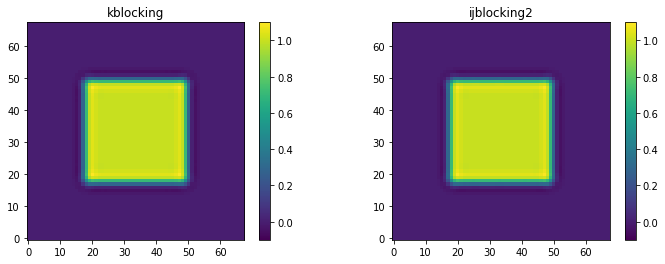

MAE [0.00016536]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 8 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


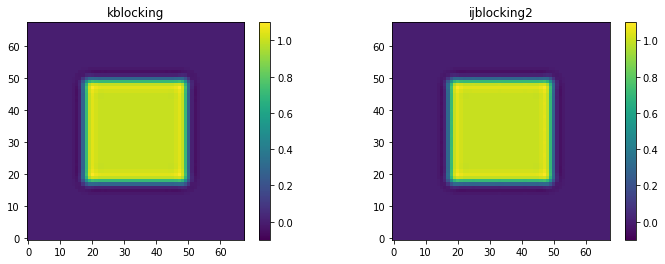

MAE [0.00022568]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 64 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 64 --nz 64 --size_i 8 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


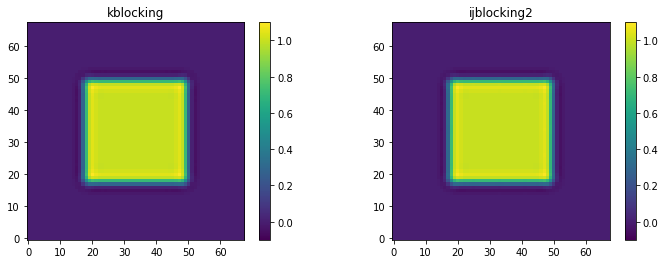

MAE [0.00025217]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 2 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


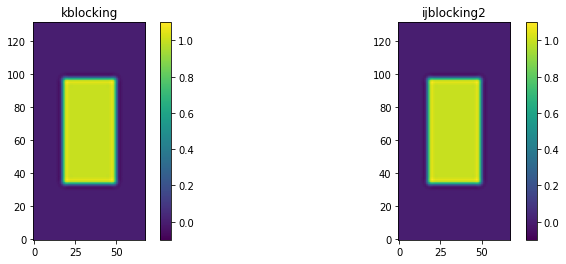

MAE [0.0002169]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 2 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


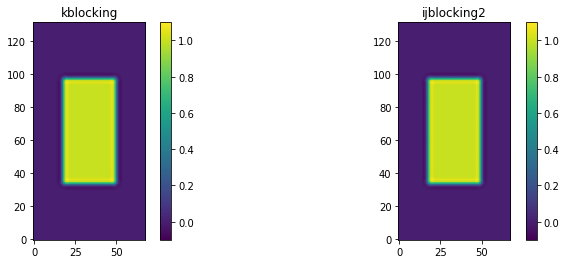

MAE [0.00028517]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 2 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


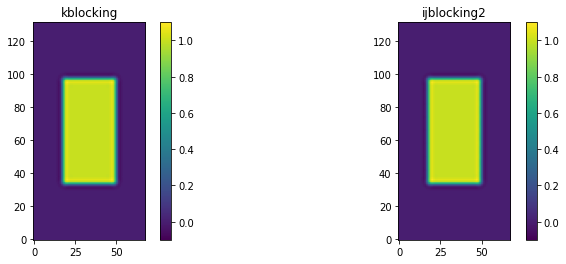

MAE [0.0003193]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 4 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


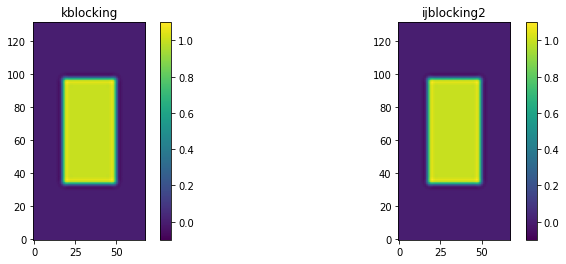

MAE [0.00015873]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 4 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


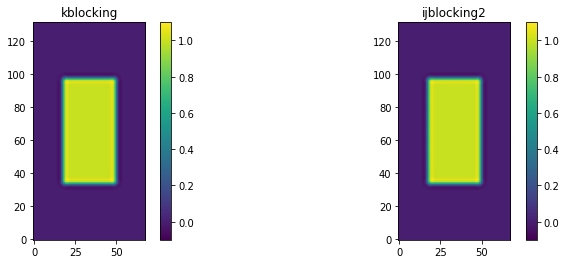

MAE [0.00021892]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 4 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


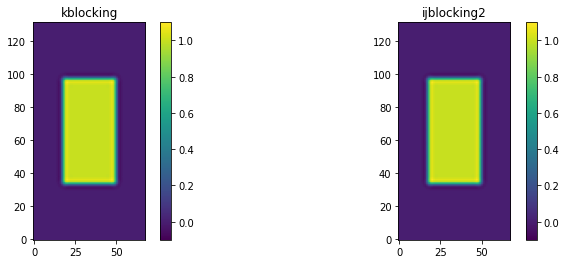

MAE [0.00024621]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 8 --size_j 2 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


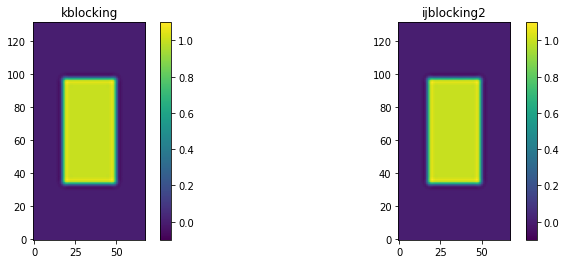

MAE [0.00014113]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 8 --size_j 4 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


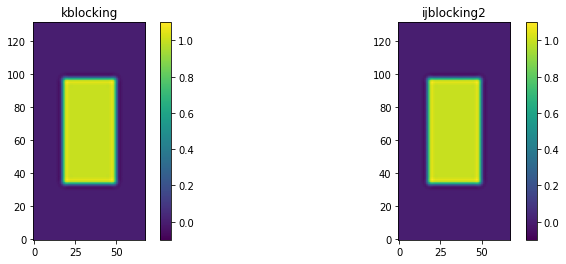

MAE [0.00019951]
['ijblocking2']
srun -n 1 ./stencil2d-kblocking.x --nx 64 --ny 128 --nz 64 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun -n 1 ./stencil2d-ijblocking2.x --nx 64 --ny 128 --nz 64 --size_i 8 --size_j 8 --num_iter 10
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


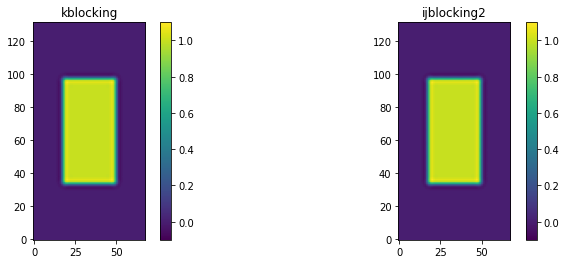

MAE [0.00022607]
['ijblocking2']


In [60]:
# srun slurm comand to start a job
# -n number of processes requested
versions = ['kblocking','ijblocking2'] ## THIS SHOULD BE A COPY OF VERSIONS IN CELL ABOVE

output = {}
out_field = {}

nx = np.array([64])
ny = np.array([32,64,128])
size_i = np.array([2,4,8])
size_j = np.array([2,4,8])
      
#if versions[0] != 'kblocking':
#    sys.exit('kblocking has to be first in versions. Leads to error in comparisons')

runtimes = {key: np.zeros((len(nx)*len(ny)*len(size_i)*len(size_j),5)) for key in versions}
ii_index = 0
for nx_ in nx:
    for ny_ in ny:
        for size_i_ in size_i:
            
            for size_j_ in size_j:
                for version in versions:
                    command = f"srun -n 1 ./stencil2d-{version}.x --nx {nx_} --ny {ny_} --nz 64 --size_i {size_i_} --size_j {size_j_} --num_iter 10"

                    if version == 'kblocking' or  version == 'complexity-copy':
                        command = f"srun -n 1 ./stencil2d-{version}.x --nx {nx_} --ny {ny_} --nz 64 --num_iter 10"


                    print(command)
                    out =  !{command}
                    print(out[0])
                    output.update({version: out})
                    out_field.update({version: read_field_from_file('out_field.dat')})

                validate_results(out_field)


srun -n 1 ./stencil2d-kblocking.x+orig --nx 128 --ny 128 --nz 64 --num_iter 1024
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,  128,  128,   64,    1024,  0.1446068E+01], \\', '] )']
srun -n 1 ./stencil2d-ijblocking-small.x+orig --nx 128 --ny 128 --nz 64 --size_i 64 --size_j 64 --num_iter 1024
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,  128,  128,   64,    1024,  0.1494338E+01], \\', '] )']
srun -n 1 ./stencil2d-ijblocking-inline.x+orig --nx 128 --ny 128 --nz 64 --size_i 64 --size_j 64 --num_iter 1024
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,  128,  128,   64,    1024,  0.2819295E+01], \\', '] )']


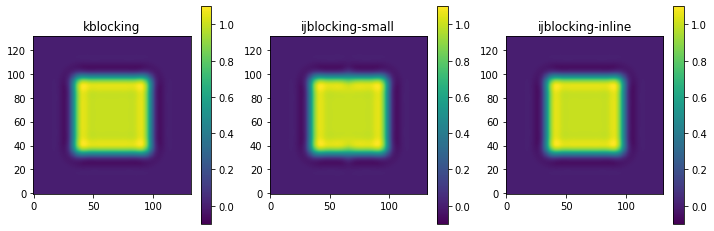

MAE [4.19789219e-04 3.90739645e-05]
['ijblocking-small', 'ijblocking-inline']
\n ============================= \n


In [9]:
# srun slurm comand to start a job
# -n number of processes requested
versions = ['kblocking', 'ijblocking-small', 'ijblocking-inline'] ## THIS SHOULD BE A COPY OF VERSIONS IN CELL ABOVE

output = {}
out_field = {}

nx = np.array([128])
ny = np.array([128])
size_i = np.array([64])
size_j = np.array([64])
num_iter = 1024

      
if versions[0] != 'kblocking':
    sys.exit('kblocking has to be first in versions. Leads to error in comparisons')

runtimes = {key: np.zeros((len(nx)*len(ny)*len(size_i)*len(size_j),5)) for key in versions}
ii_index = 0
for nx_ in nx:
    for ny_ in ny:
        for size_i_ in size_i:
            
            for size_j_ in size_j:
                for version in versions:
                    command = f"srun -n 1 ./stencil2d-{version}.x+orig --nx {nx_} --ny {ny_} --nz 64 --size_i {size_i_} --size_j {size_j_} --num_iter {num_iter}"
                    

                    if version == 'kblocking' :
                        command = f"srun -n 1 ./stencil2d-{version}.x+orig --nx {nx_} --ny {ny_} --nz 64 --num_iter {num_iter}"
                        
                        

                    print(command)
                    out =  !{command}
                    print(out)
                    output.update({version: out})
                    out_field.update({version: read_field_from_file('out_field.dat')})

                validate_results(out_field)
                pattern = r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?"
                for i, (key, value) in enumerate(output.items()):
                    matches = re.findall(pattern, value[2])
                    runtimes[key][ii_index] = [nx_,ny_,size_i_,size_j_,float(matches[-1])]
                ii_index+=1
                print(r'\n ============================= \n')


import pickle 

with open('saved_runtimes.pkl', 'wb') as f:
    pickle.dump(runtimes, f)


In [8]:
with open('saved_runtimes.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
loaded_dict

{'kblocking': array([[128.      , 128.      ,  64.      ,  64.      ,   1.462654]]),
 'ijblocking-small': array([[128.      , 128.      ,  64.      ,  64.      ,   1.495307]]),
 'ijblocking-inline': array([[128.    , 128.    ,  64.    ,  64.    ,   2.8258]])}

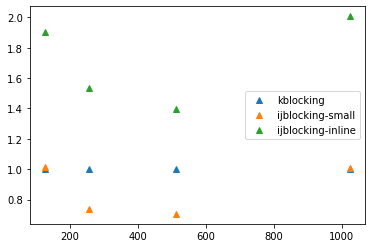

In [13]:



for i, (key,value) in enumerate(runtimes.items()):
    if i == 0:
        ref_value = value
    plt.plot(value[:,0], value[:,-1]/ref_value[:,-1], '^', label = key)

    
plt.legend()


In [ ]:
# srun slurm comand to start a job
# -n number of processes requested

versions = ['kblocking', 'ijblocking-small', 'ijblocking-inline', 'ijblocking-math', 'ijblocking2',] ## THIS SHOULD BE A COPY OF VERSIONS IN CELL ABOVE


output = {}
out_field = {}

nx = np.array([64,128,256,512,1024,2048])
ny = np.array([64,128,256,512,1024,2048])
size_i = np.array([8,16,32,64,128,256])
size_j = np.array([8,16,32,64,128,256])
num_iter = 1024

      
if versions[0] != 'kblocking':
    sys.exit('kblocking has to be first in versions. Leads to error in comparisons')

runtimes = {key: np.zeros((len(nx)*len(ny)*len(size_i)*len(size_j),5)) for key in versions}
ii_index = 0
for nx_ in nx:
    for ny_ in ny:
        for size_i_ in size_i:
            
            for size_j_ in size_j:
                if size_i_>= nx_:
                    continue
                if size_j_ >= ny_:
                    continue
                for version in versions:
                    command = f"srun -n 1 ./stencil2d-{version}.x+orig --nx {nx_} --ny {ny_} --nz 64 --size_i {size_i_} --size_j {size_j_} --num_iter {num_iter}"
                    

                    if version == 'kblocking' :
                        
                        command = f"srun -n 1 ./stencil2d-{version}.x+orig --nx {nx_} --ny {ny_} --nz 64 --num_iter {num_iter}"
                        
                        

                    print(command)
                    out =  !{command}
                    print(out)
                    output.update({version: out})
                    #out_field.update({version: read_field_from_file('out_field.dat')})

                #validate_results(out_field, if_plot=False)
                pattern = r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?"
                for i, (key, value) in enumerate(output.items()):
                    
                    try:
                        runtimes[key][ii_index] = [nx_,ny_,size_i_,size_j_,float(re.findall(pattern, value[2])[-1])]
                    except:
                        runtimes[key][ii_index] = [nx_,ny_,size_i_,size_j_,np.nan]
                        
                        
                ii_index+=1
                print('\n ============================= \n')


with open('saved_runtimes.pkl', 'wb') as f:
    pickle.dump(runtimes, f)

srun -n 1 ./stencil2d-kblocking.x+orig --nx 64 --ny 64 --nz 64 --num_iter 1024
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   64,   64,   64,    1024,  0.3779016E+00], \\', '] )']
srun -n 1 ./stencil2d-ijblocking-small.x+orig --nx 64 --ny 64 --nz 64 --size_i 8 --size_j 8 --num_iter 1024
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   64,   64,   64,    1024,  0.9218981E+00], \\', '] )']
srun -n 1 ./stencil2d-ijblocking-inline.x+orig --nx 64 --ny 64 --nz 64 --size_i 8 --size_j 8 --num_iter 1024
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   64,   64,   64,    1024,  0.1326763E+01], \\', '] )']
srun -n 1 ./stencil2d-ijblocking-math.x+orig --nx 64 --ny 64 --nz 64 --size_i 8 --size_j 8 --num_iter 1024
['# ranks nx ny nz num_iter time', 'data = np.array( [ \\', '[    1,   64,   64,   64,    1024,  0.6094174E+00], \\', '] )']
srun -n 1 ./stencil2d-ijblocking2.x+orig --nx 64 --ny 64 --nz 64 --size_i 8 --size_j 8 --num_iter

In [ ]:
for i, (key,value) in enumerate(runtimes.items()):
    if i == 0:
        ref_value = value
    plt.plot(value[:,3]/value[:,2], value[:,-1]/ref_value[:,-1], '^', label = key)

    
plt.legend()
